In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving book.csv to book (2).csv


In [4]:
import io
books = pd.read_csv(io.BytesIO(uploaded['book.csv']))

In [5]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
len(books)

2000

In [7]:
books.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [8]:
books.shape

(2000, 11)

In [9]:
count = books.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
count.sort_values(0,ascending=False,inplace=True)
count

CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# <font color='maroon'>**Apriori algorithm**</font>

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

## <font color='magenta'>**Association rules with 10% support and 30% confidence**</font>

In [14]:
# with 10% support
frq_items_10 = apriori(books, min_support = 0.10, use_colnames = True)
frq_items_10['length'] = frq_items_10['itemsets'].apply(lambda x: len(x))
frq_items_10

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [15]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


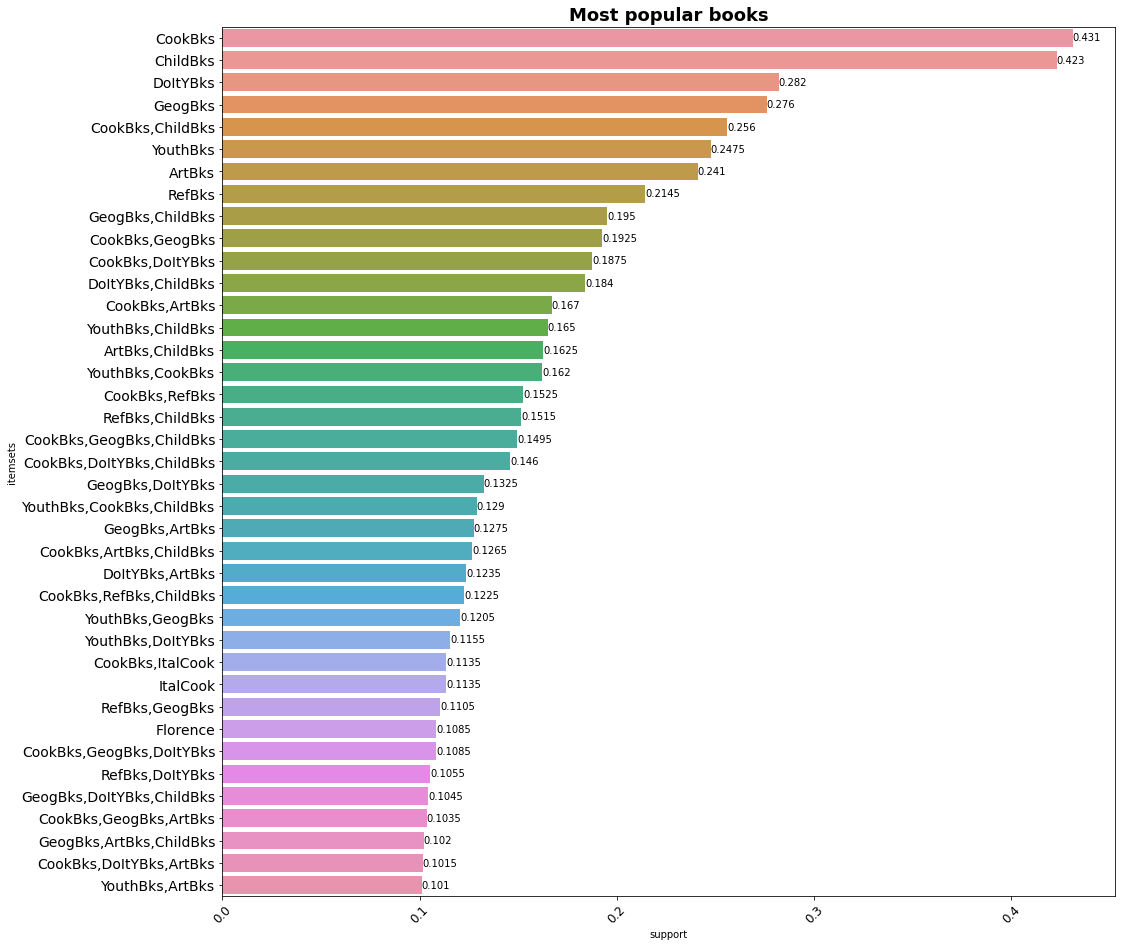

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

frq_items_10_sort = frq_items_10.sort_values(by='support',ascending=False)
frq_items_10_sort['itemsets'] = frq_items_10_sort['itemsets'].apply(lambda a: ','.join(list(a)))
plt.figure(figsize = (16,16))
ax = sns.barplot(x = 'support', y = 'itemsets', data=frq_items_10_sort)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Most popular books',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

<font color='green'>Support value says how frequently the particular item has been bought. Here, cook books and child books are the most popular ones.</font>

In [18]:
# with 30% confidence
rules_30 = association_rules(frq_items_10,metric='confidence', min_threshold=0.30)
rules_30_sort = rules_30.sort_values(by='confidence',ascending=False)
rules_30_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
81,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
86,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
52,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
63,(ChildBks),"(CookBks, GeogBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
61,(CookBks),"(GeogBks, ChildBks)",0.4310,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522
49,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
47,(CookBks),"(DoItYBks, ChildBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021


In [19]:
# sorting with increasing value of lift > 1
rules_30_1 = rules_30.copy()
rules_30_1["antecedents"] = rules_30["antecedents"].apply(lambda x: ','.join(list(x)))
rules_30_1["consequents"] = rules_30["consequents"].apply(lambda x: ','.join(list(x)))
rules_30_lift = rules_30_1[rules_30_1.lift > 1.0]
rules_30_lift_sort = rules_30_lift.sort_values(by='lift',ascending=False)
rules_30_lift_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,ItalCook,CookBks,0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
71,"ArtBks,ChildBks",GeogBks,0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
72,GeogBks,"ArtBks,ChildBks",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
78,ArtBks,"CookBks,DoItYBks",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
74,"CookBks,DoItYBks",ArtBks,0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
...,...,...,...,...,...,...,...,...,...
4,DoItYBks,ChildBks,0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,YouthBks,CookBks,0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,CookBks,YouthBks,0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,ChildBks,CookBks,0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


<font color='green'>Confidence says how likely item y is purchased when item x is purchased, expressed as {x->y} . However, one drawback of confidence measure is it does not account for the base popularity of both constituent items individually. So a third measure called Lift is used.

<font color='green'>Lift says how likely item y is purchased when item x is purchased while accounting for how popular y is.
- Lift = 1 --> no association between items
- Lift > 1 --> item y is likely to be bought if item x is bought
- Lift < 1 --> item y is unlikely to be bought if item x is bought</font>

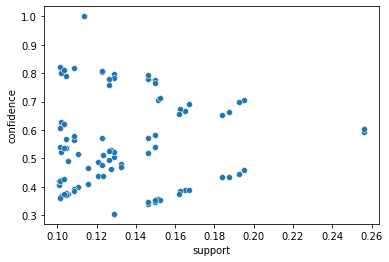

In [20]:
sns.scatterplot(x='support',y='confidence',data=rules_30);

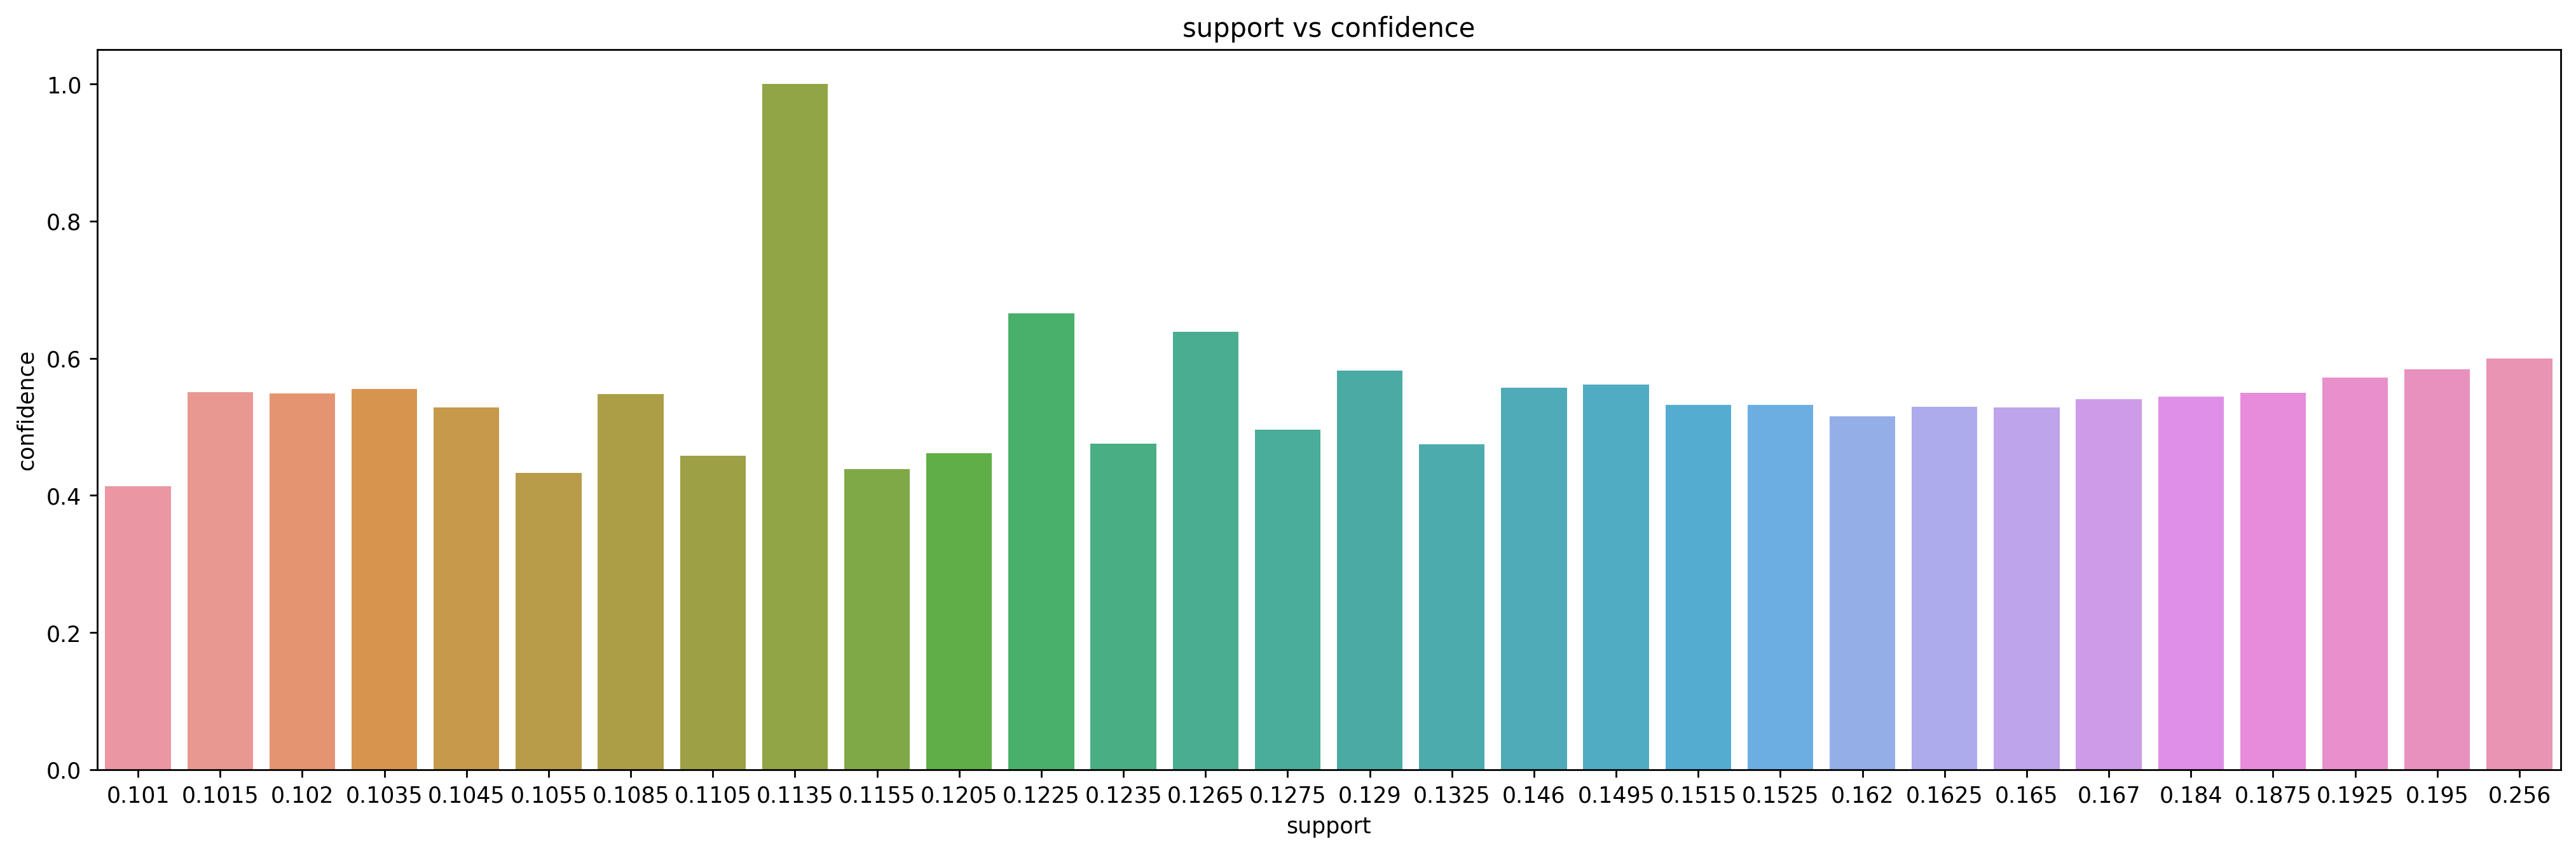

In [23]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support",y="confidence",data=rules_30,ci=None)
plt.title("support vs confidence");

In [24]:
matrix_30 = rules_30_lift_sort.pivot('antecedents','consequents','lift')
matrix_30

consequents,ArtBks,"ArtBks,ChildBks",ChildBks,CookBks,"CookBks,ArtBks","CookBks,ChildBks","CookBks,DoItYBks","CookBks,GeogBks",DoItYBks,"DoItYBks,ChildBks",GeogBks,"GeogBks,ChildBks",RefBks,YouthBks,"YouthBks,CookBks"
antecedents,,,,,,,,,,,,,,,
ArtBks,NaN,NaN,1.594028,1.607763,NaN,2.050376,2.246196,2.230964,1.817192,NaN,1.916832,2.170444,NaN,1.693281,NaN
"ArtBks,ChildBks",NaN,NaN,NaN,1.806175,NaN,NaN,NaN,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN
ChildBks,1.594028,NaN,NaN,1.404179,NaN,NaN,1.840820,1.835989,1.542511,NaN,1.670264,NaN,1.669725,1.576044,1.882497
CookBks,1.607763,NaN,1.404179,NaN,NaN,NaN,NaN,NaN,1.542677,1.841017,1.618245,1.778809,1.649549,1.518667,NaN
"CookBks,ArtBks",NaN,NaN,1.790745,NaN,NaN,NaN,NaN,NaN,2.155264,NaN,2.245509,NaN,NaN,NaN,NaN
"CookBks,ChildBks",2.050376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.022385,NaN,2.115885,NaN,2.230842,2.035985,NaN
"CookBks,DoItYBks",2.246196,NaN,1.840820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.096618,NaN,NaN,NaN,NaN
"CookBks,GeogBks",2.230964,NaN,1.835989,NaN,NaN,NaN,NaN,NaN,1.998711,NaN,NaN,NaN,NaN,NaN,NaN
"CookBks,RefBks",NaN,NaN,1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


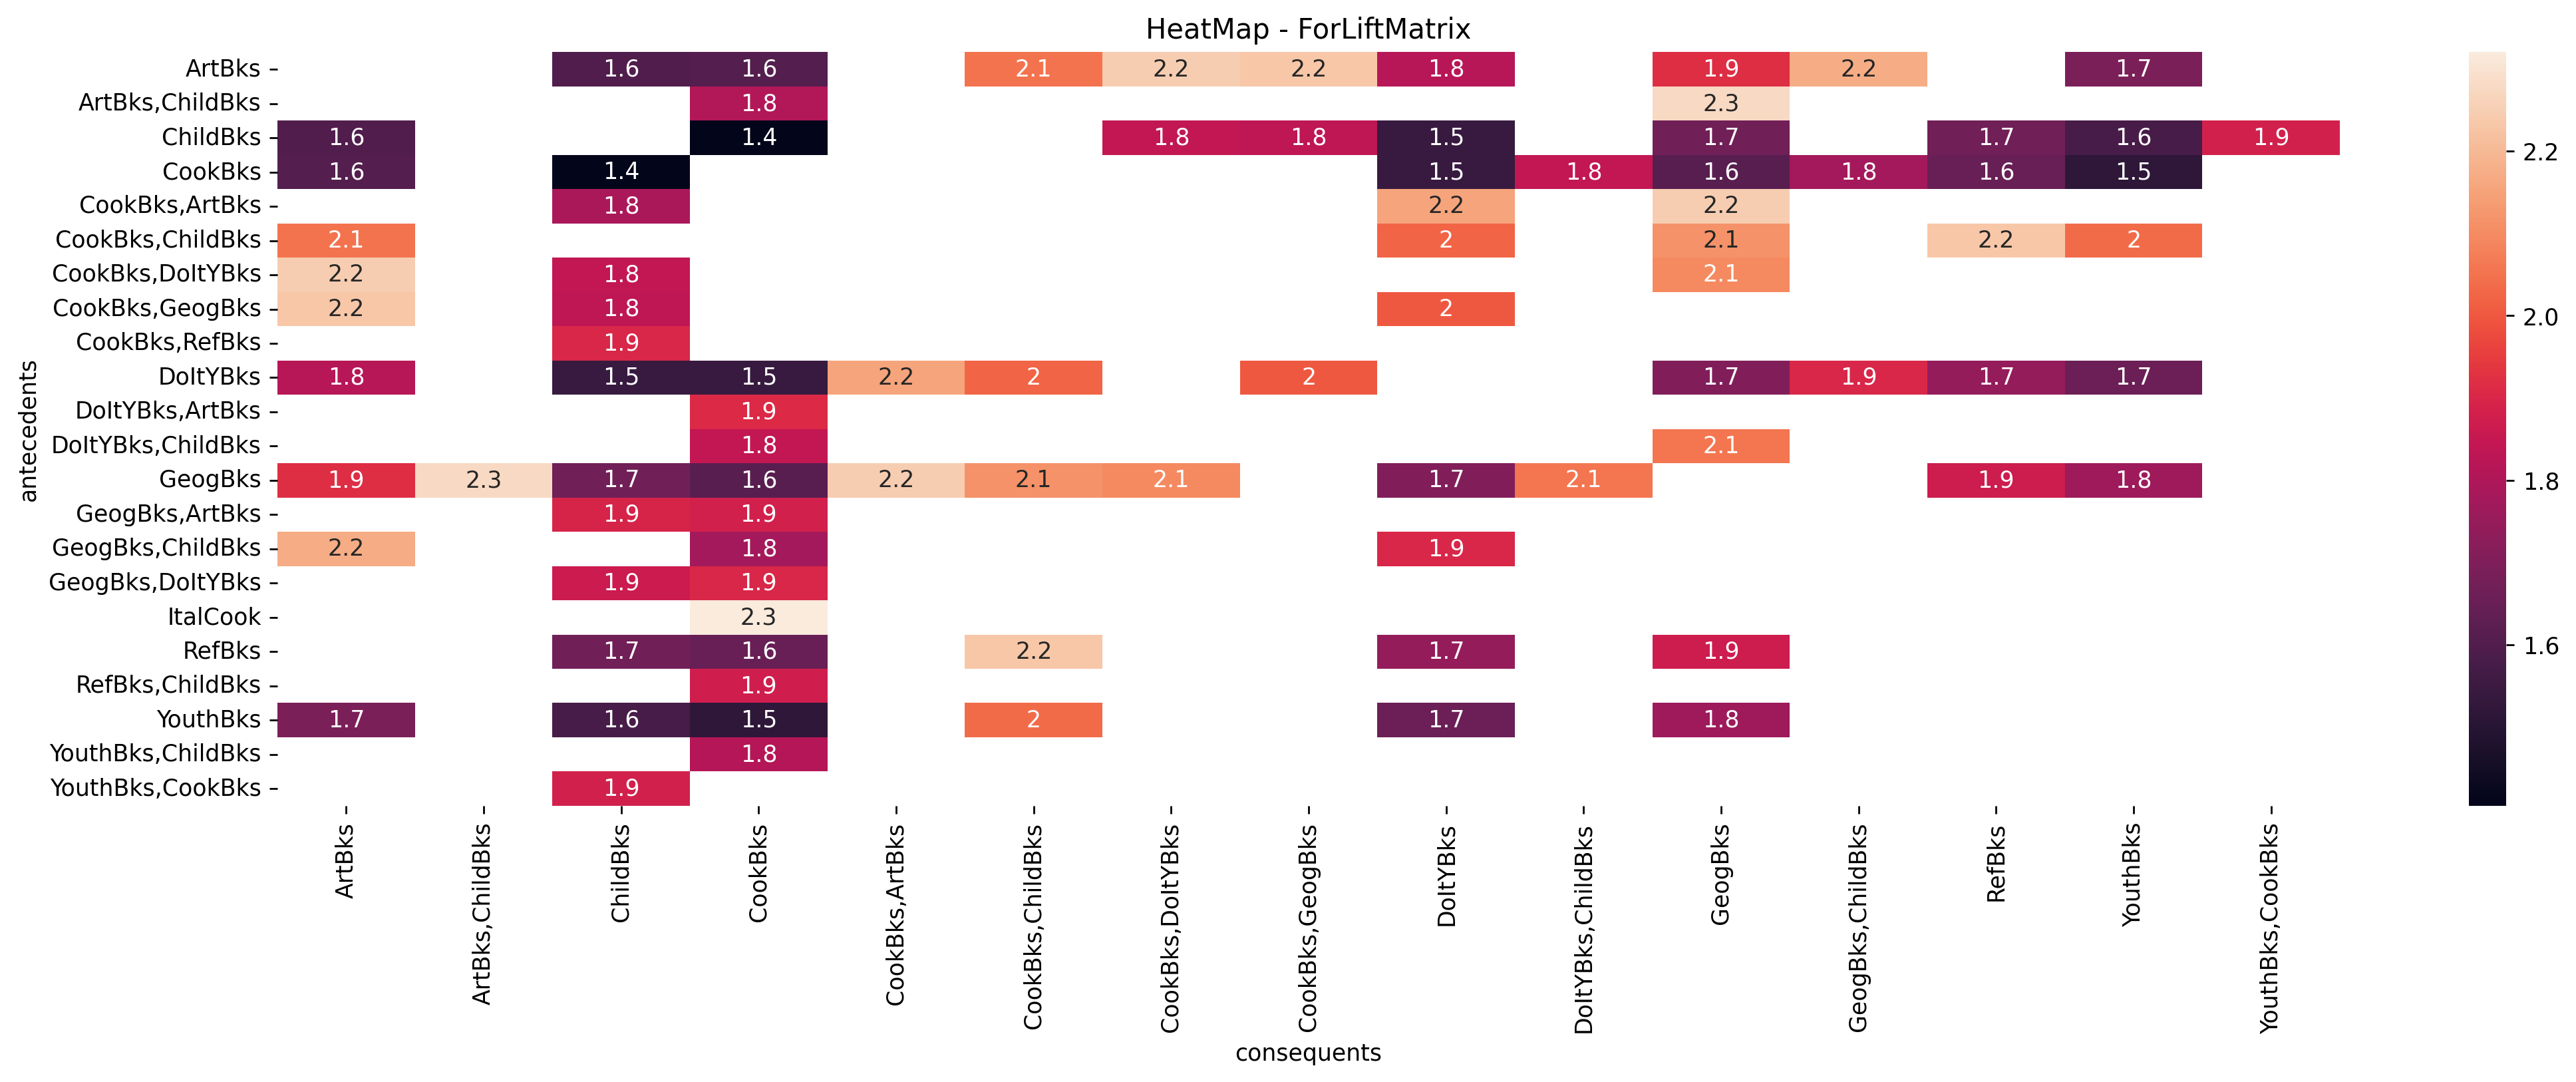

In [25]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix_30,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

## <font color='magenta'>**Association rules with 15% support and 50% confidence**</font>

In [26]:
# with 15% support
frq_items_15 = apriori(books, min_support = 0.15, use_colnames = True)
frq_items_15['length'] = frq_items_15['itemsets'].apply(lambda x: len(x))
frq_items_15

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


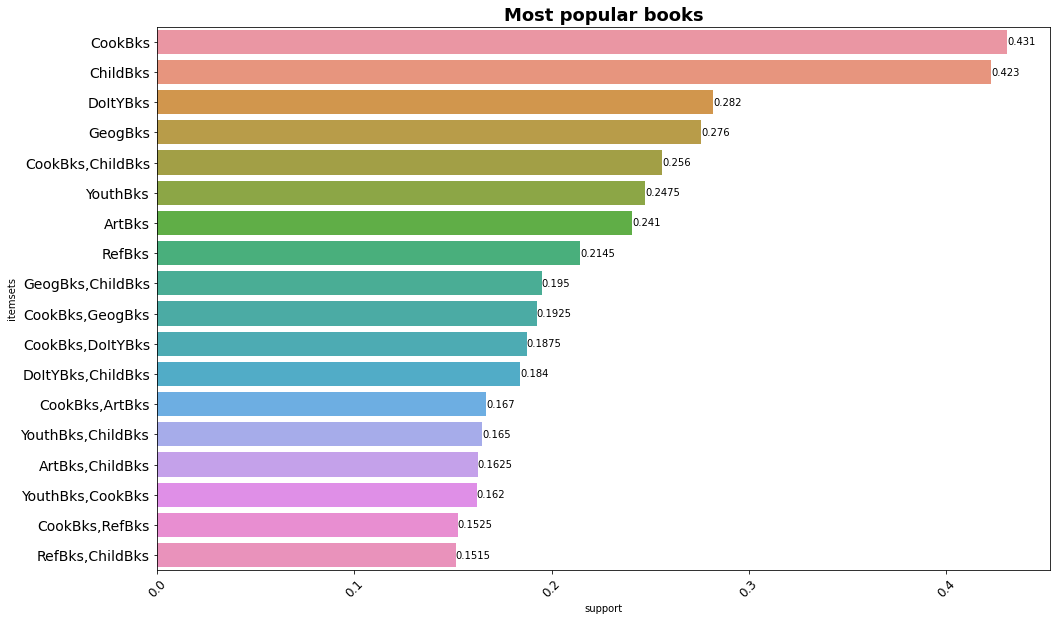

In [28]:
frq_items_15_sort = frq_items_15.sort_values(by='support',ascending=False)
frq_items_15_sort['itemsets'] = frq_items_15_sort['itemsets'].apply(lambda a: ','.join(list(a)))
plt.figure(figsize = (16,10))
ax = sns.barplot(x = 'support', y = 'itemsets', data=frq_items_15_sort)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Most popular books',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [30]:
# with 50% confidence
rules_50 = association_rules(frq_items_15,metric='confidence', min_threshold=0.50)
rules_50_sort = rules_50.sort_values(by='confidence',ascending=False)
rules_50_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
11,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
10,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
5,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
8,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
7,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [31]:
# sorting with increasing value of lift > 1
rules_50_1 = rules_50.copy()
rules_50_1["antecedents"] = rules_50["antecedents"].apply(lambda x: ','.join(list(x)))
rules_50_1["consequents"] = rules_50["consequents"].apply(lambda x: ','.join(list(x)))
rules_50_lift = rules_50_1[rules_50_1.lift > 1.0]
rules_50_lift_sort = rules_50_lift.sort_values(by='lift',ascending=False)
rules_50_lift_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,GeogBks,ChildBks,0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,RefBks,ChildBks,0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
9,RefBks,CookBks,0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
11,GeogBks,CookBks,0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
10,ArtBks,CookBks,0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
5,ArtBks,ChildBks,0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,YouthBks,ChildBks,0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
8,DoItYBks,CookBks,0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
3,DoItYBks,ChildBks,0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
7,YouthBks,CookBks,0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


<font color='green'>Even when confidence is high, if the lift value is equal to 1, means they have no association. Only when lift > 1, means the two items or particular set of items are associated. If x is bought y is also likely to be bought.</font>

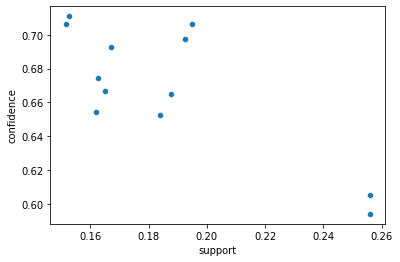

In [32]:
sns.scatterplot(x='support',y='confidence',data=rules_50);

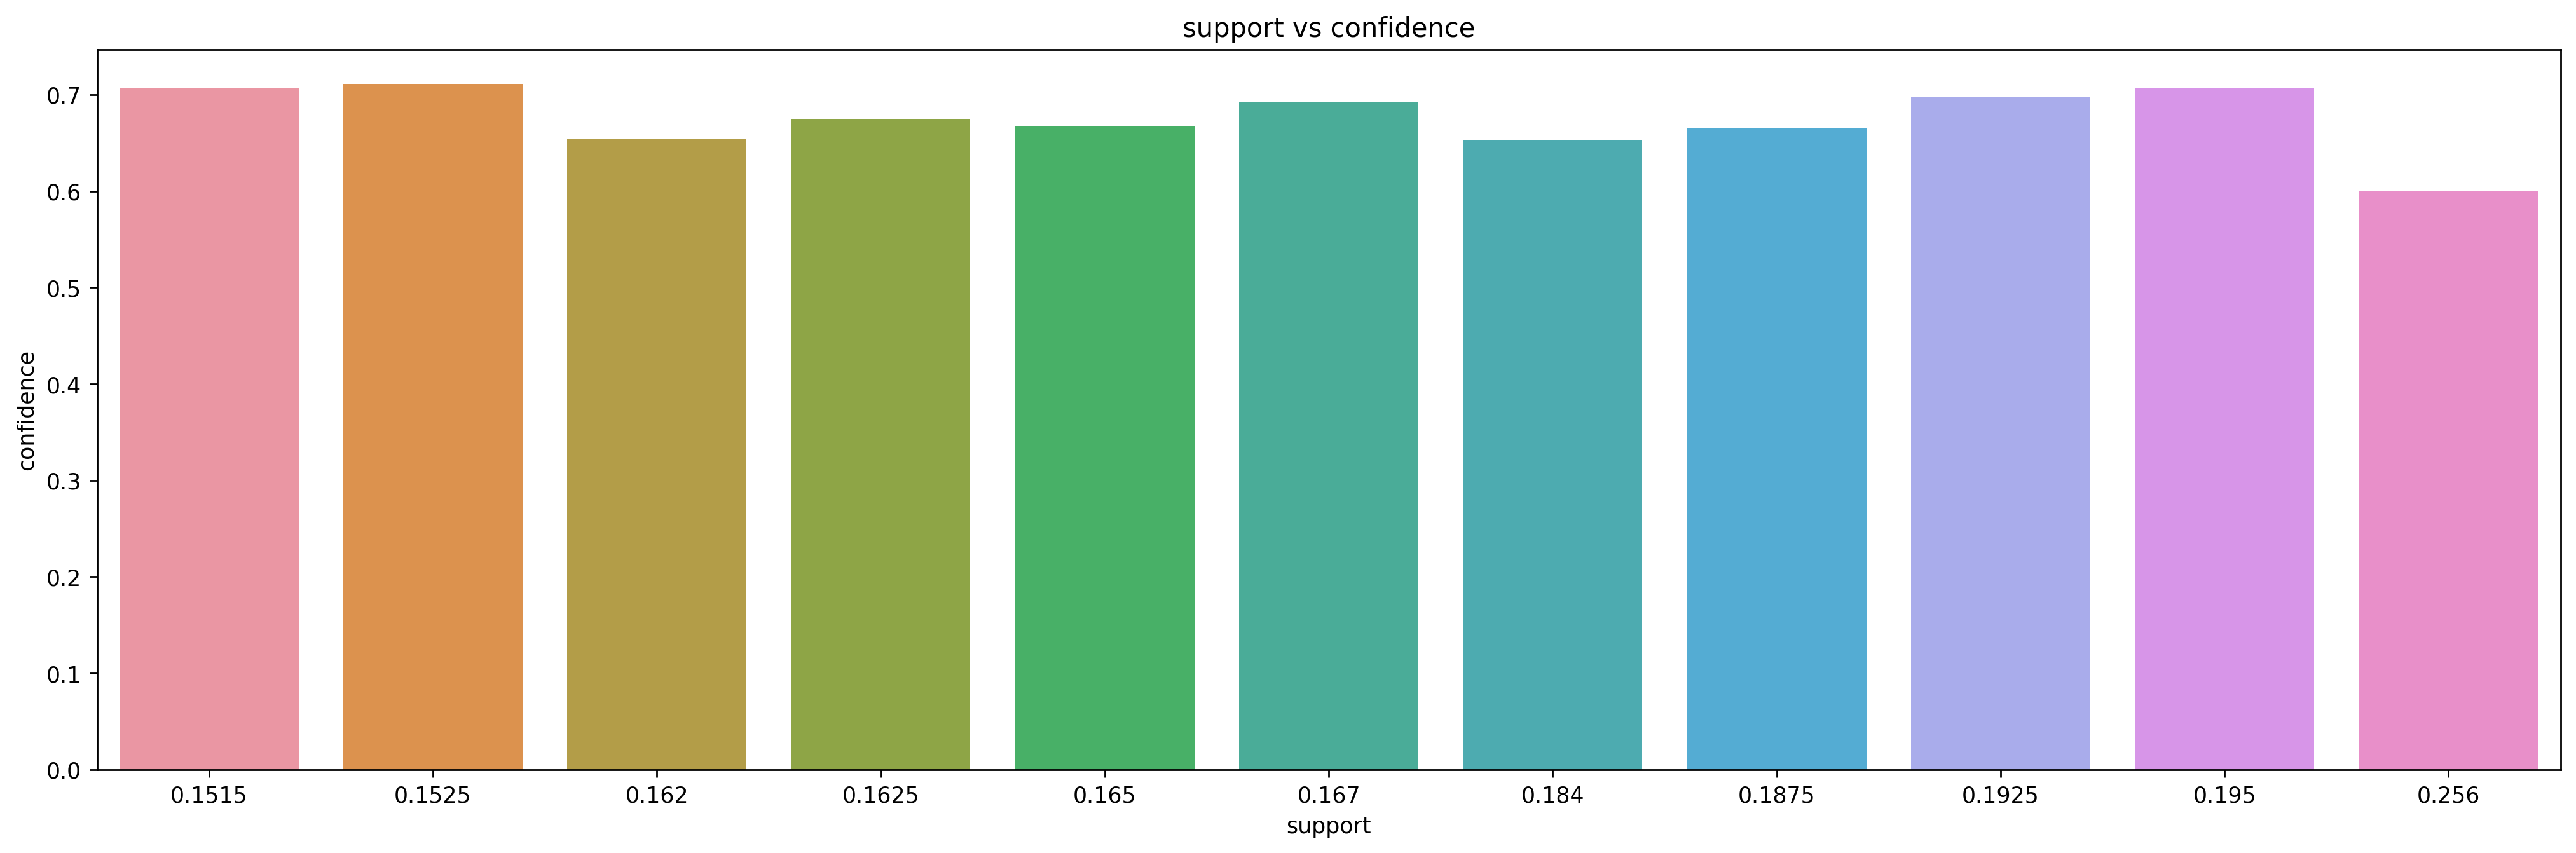

In [38]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support",y="confidence",data=rules_50,ci=None)
plt.title("support vs confidence");

In [39]:
matrix_50 = rules_50_lift_sort.pivot('antecedents','consequents','lift')
matrix_50

consequents,ChildBks,CookBks
antecedents,,
ArtBks,1.594028,1.607763
ChildBks,NaN,1.404179
CookBks,1.404179,NaN
DoItYBks,1.542511,1.542677
GeogBks,1.670264,1.618245
RefBks,1.669725,1.649549
YouthBks,1.576044,1.518667


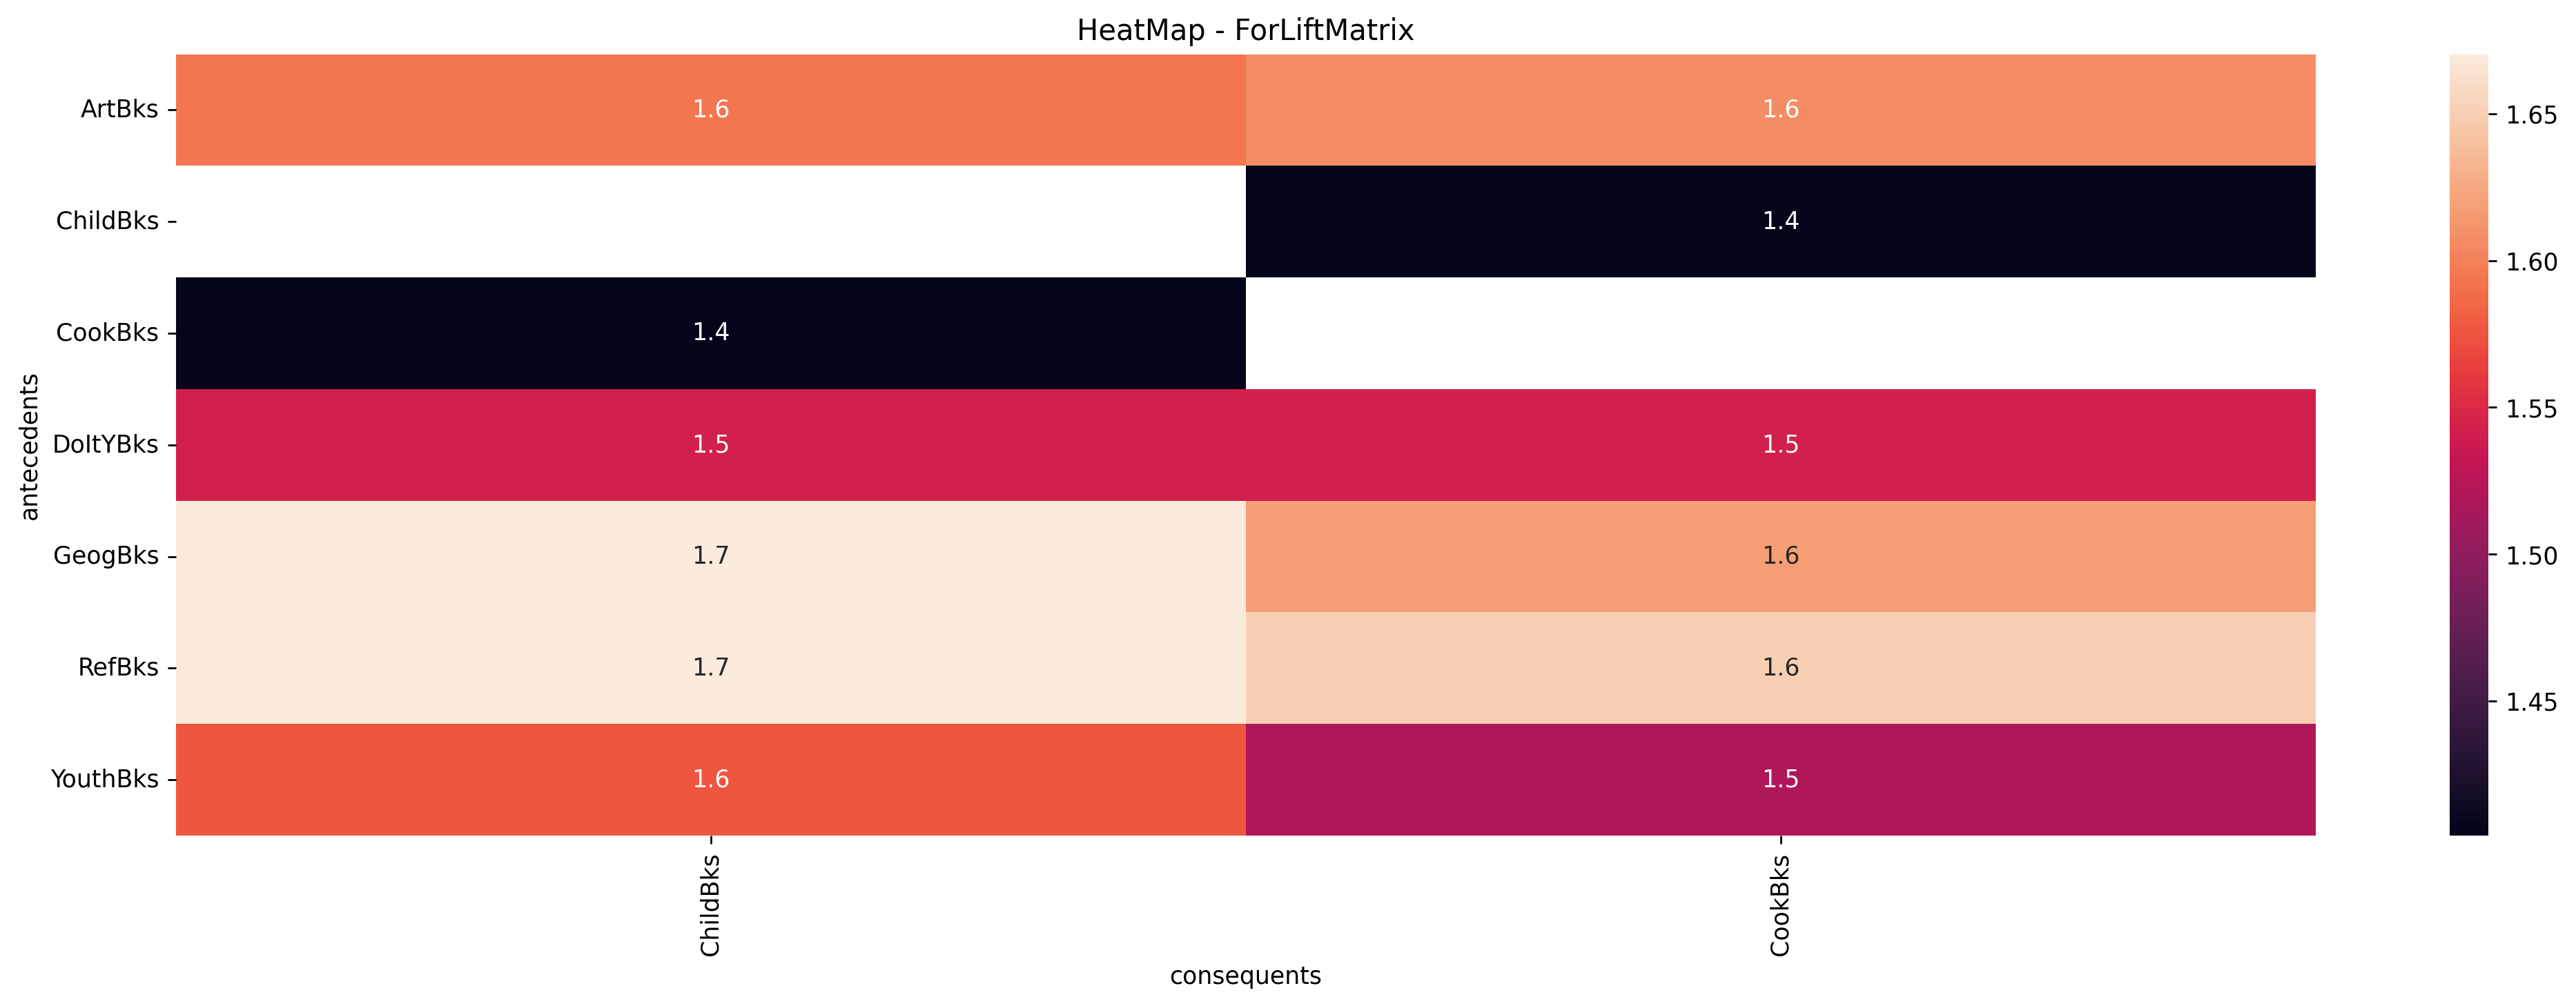

In [41]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix_50,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90);

## <font color='magenta'>**Association rules with 20% support and 60% confidence**</font>

In [42]:
# with 20% support
frq_items_20 = apriori(books, min_support = 0.20, use_colnames = True)
frq_items_20['length'] = frq_items_20['itemsets'].apply(lambda x: len(x))
frq_items_20

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


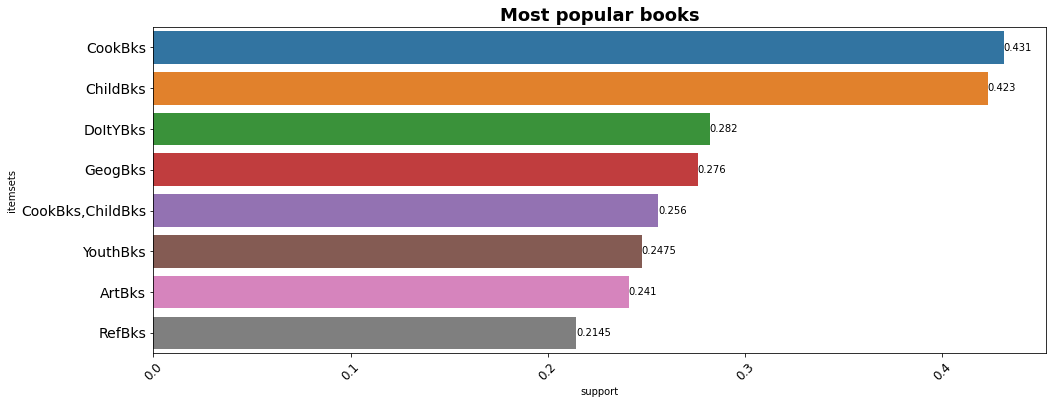

In [44]:
frq_items_20_sort = frq_items_20.sort_values(by='support',ascending=False)
frq_items_20_sort['itemsets'] = frq_items_20_sort['itemsets'].apply(lambda a: ','.join(list(a)))
plt.figure(figsize = (16,6))
ax = sns.barplot(x = 'support', y = 'itemsets', data=frq_items_20_sort)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Most popular books',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [45]:
# with 50% confidence
rules_60 = association_rules(frq_items_20,metric='confidence', min_threshold=0.60)
rules_60_sort = rules_50.sort_values(by='confidence',ascending=False)
rules_60_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
11,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
10,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
5,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
8,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
7,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
3,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [46]:
# sorting with increasing value of lift > 1
rules_60_1 = rules_60.copy()
rules_60_1["antecedents"] = rules_60["antecedents"].apply(lambda x: ','.join(list(x)))
rules_60_1["consequents"] = rules_60["consequents"].apply(lambda x: ','.join(list(x)))
rules_60_lift = rules_60_1[rules_60_1.lift > 1.0]
rules_60_lift_sort = rules_60_lift.sort_values(by='lift',ascending=False)
rules_60_lift_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,ChildBks,CookBks,0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


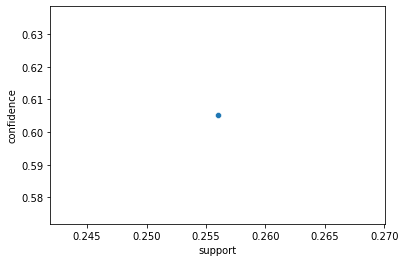

In [47]:
sns.scatterplot(x='support',y='confidence',data=rules_60);

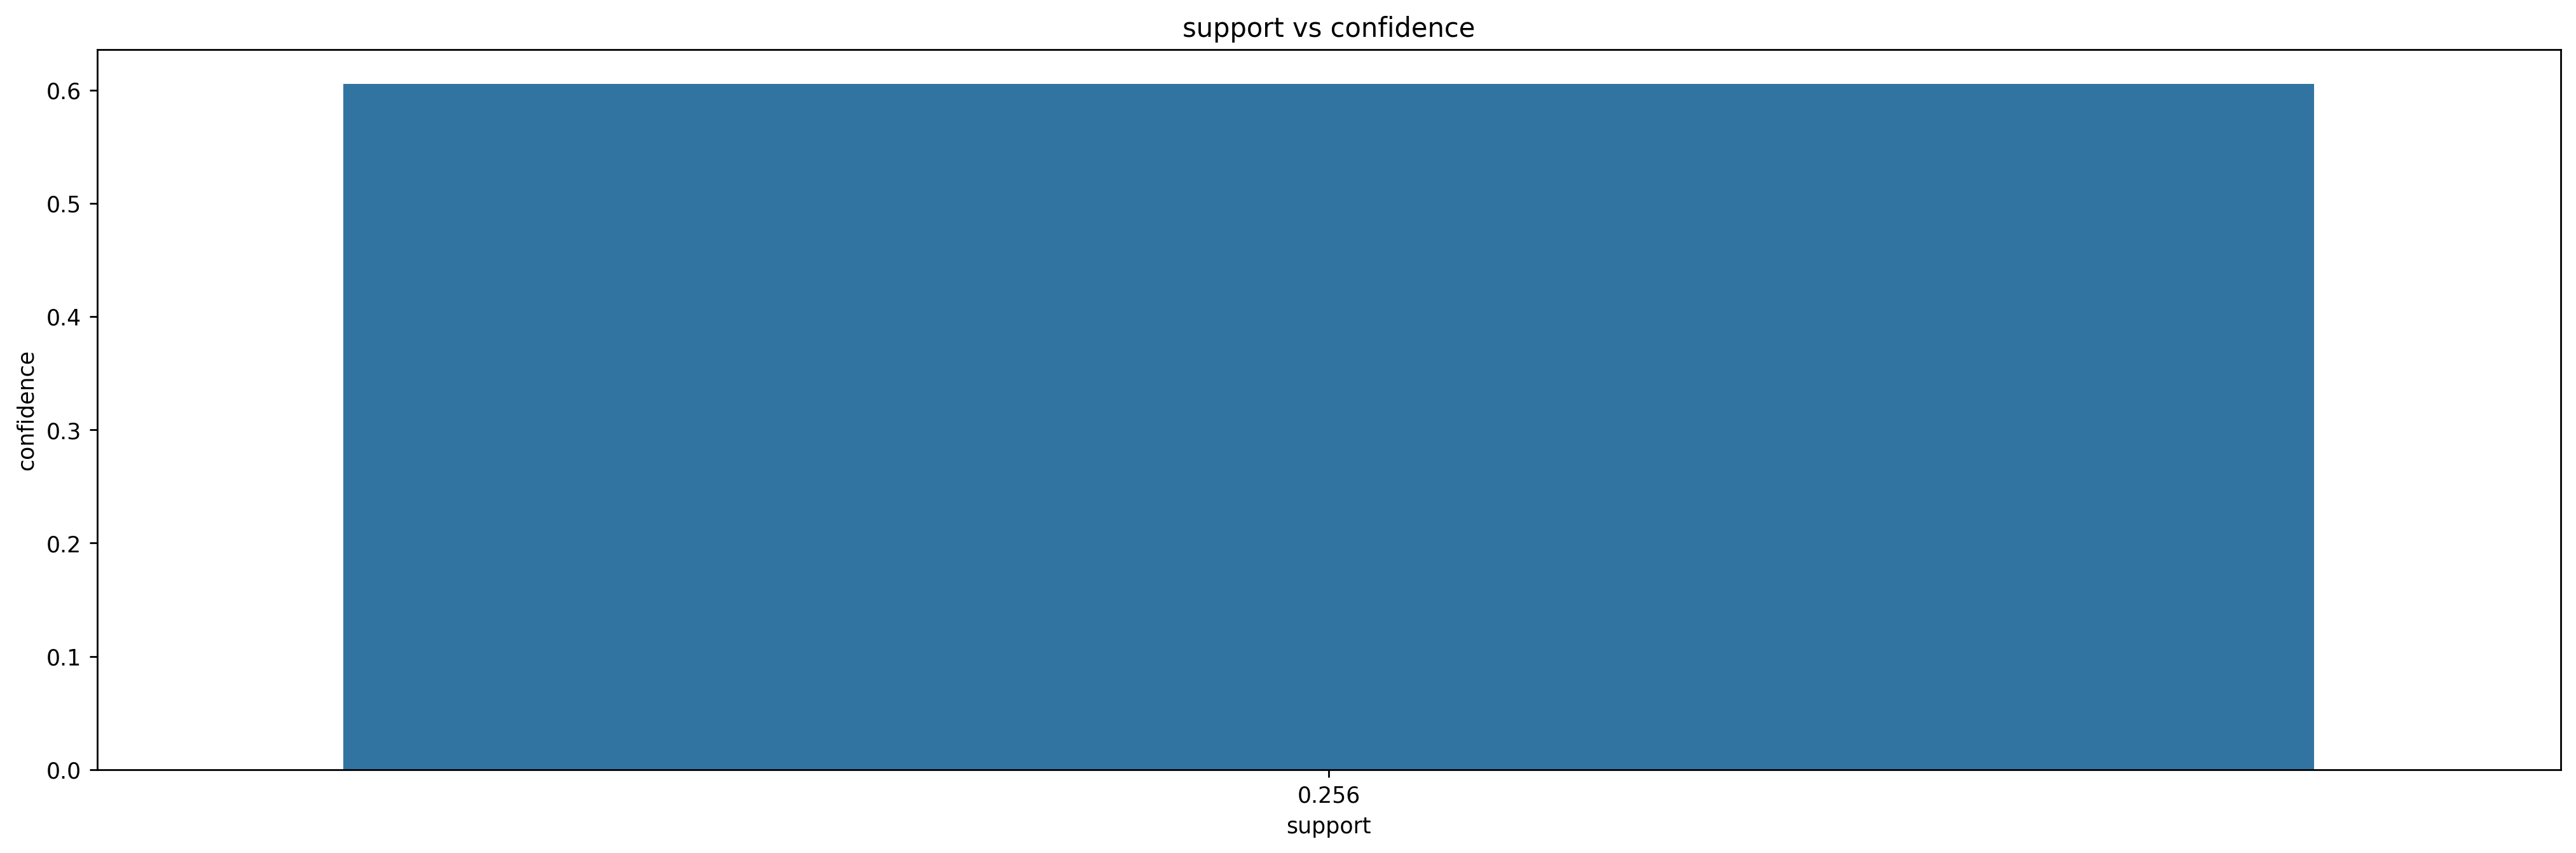

In [48]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot(x="support",y="confidence",data=rules_60,ci=None)
plt.title("support vs confidence");

In [49]:
matrix_60 = rules_60_lift_sort.pivot('antecedents','consequents','lift')
matrix_60

consequents,CookBks
antecedents,
ChildBks,1.404179


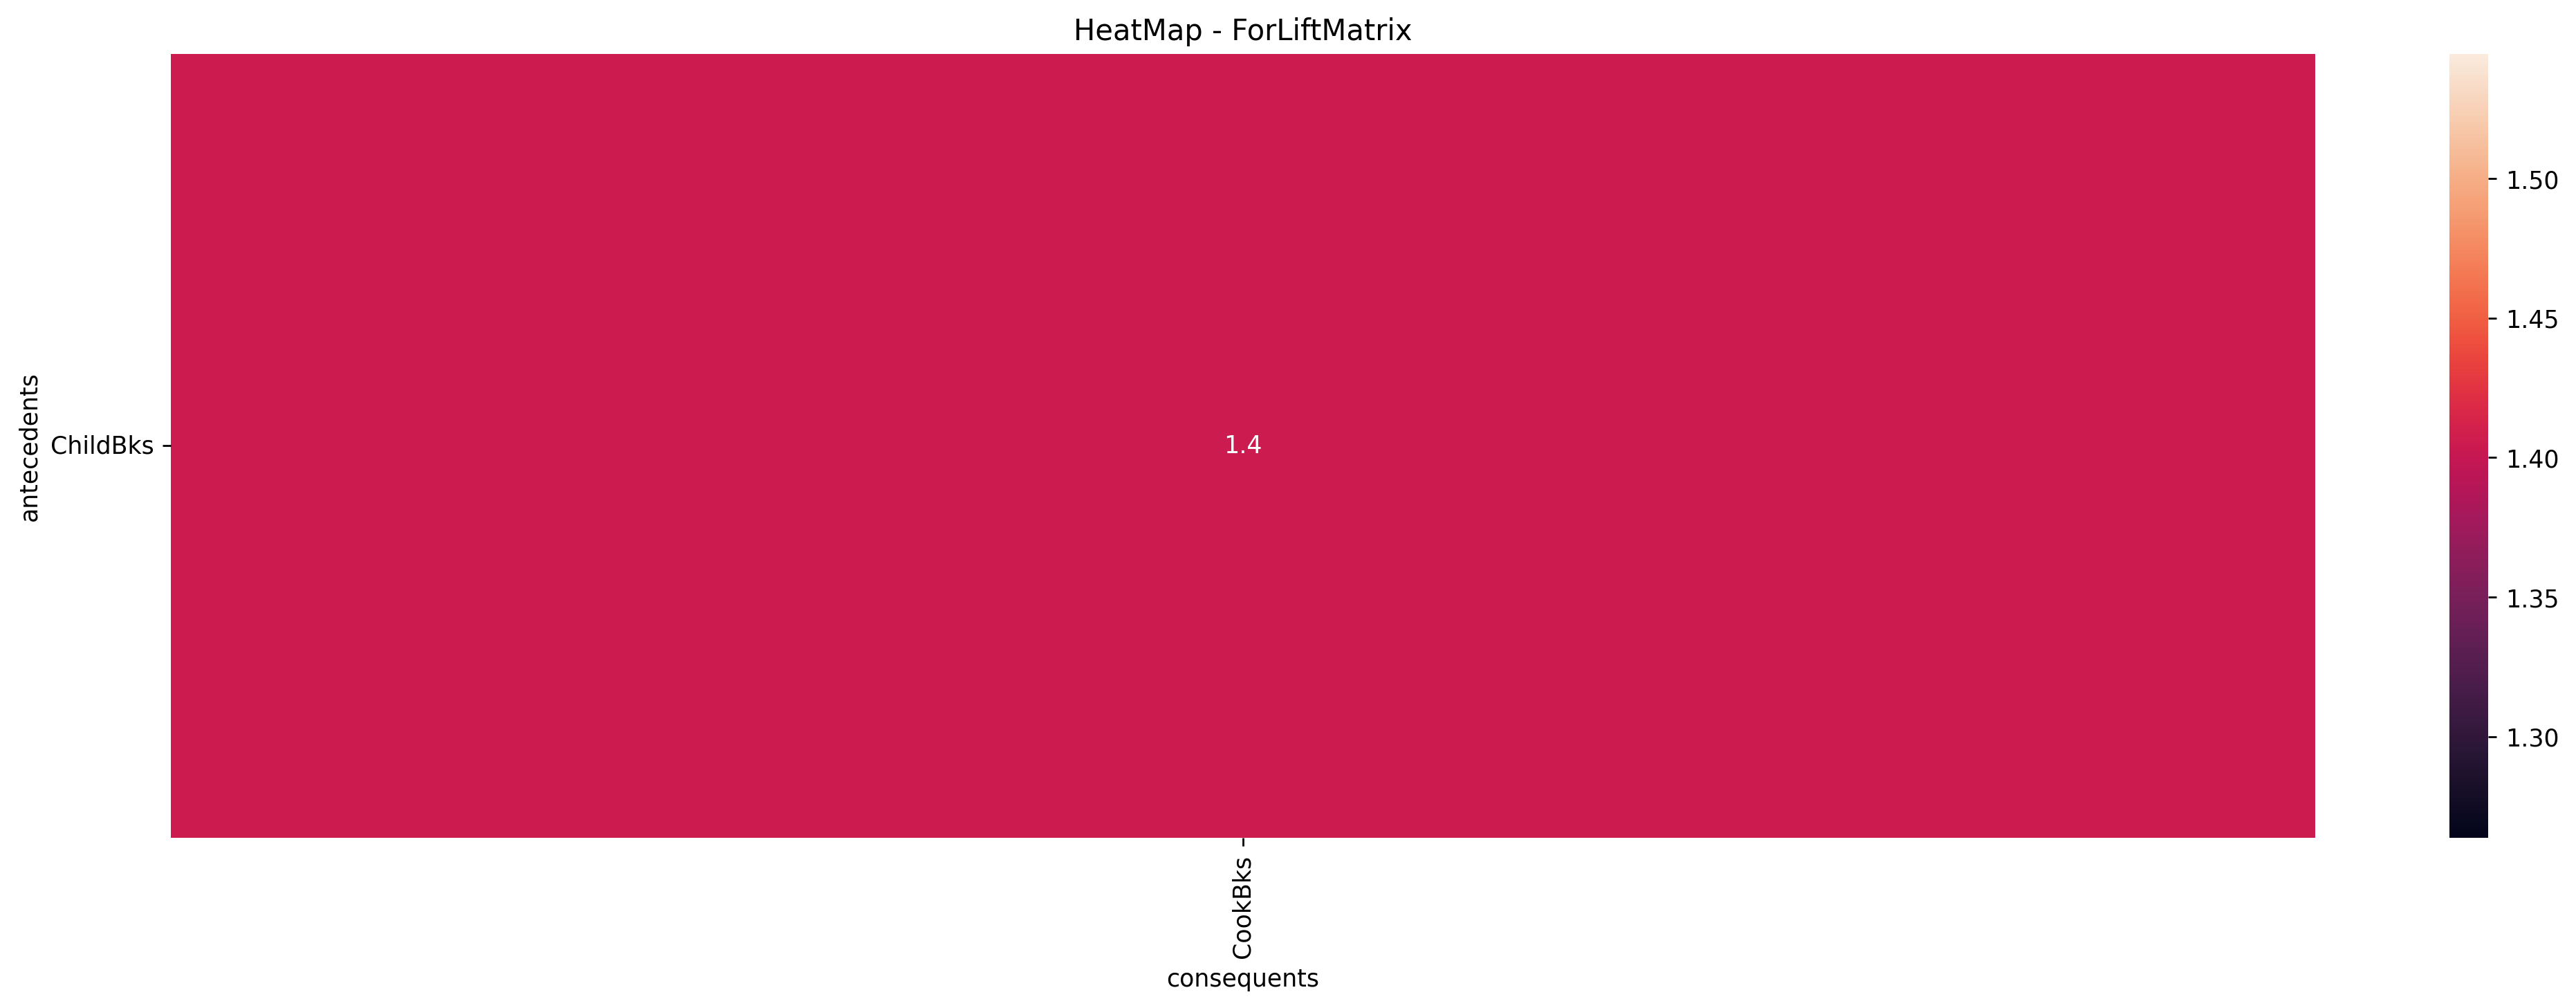

In [50]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix_60,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90);